<a href="https://colab.research.google.com/github/seungeunlee00/JUNIA/blob/main/AI/5-CNN/MNIST_Lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A simple CNN with MNIST data

* Download the MNIST database of handwritten digits
* Create, train, and validate a CNN over this data

---
🟢 Import necessary modules:

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import numpy as np
from matplotlib import pyplot

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


🟢 Set some parameters and constants:

In [ ]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28
input_shape = (28,28,1)

🟢 Load the MNIST dataset (Download if necessary):

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

##  Display some examples from the data :

Display the 18th element (index = 17 because we start from 0)

In [ ]:
np.set_printoptions(linewidth=150)   # Enlare the line the see all the element in one line
print(x_train[17])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  11 203 229  32   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  26  47  47  30  95 254 215  13   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  45 154 185 185 223 253 253 133 175 255 188  19   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 110 253 253 253 246 161 228 253 25

Now let's see it as an image :

https://predictablynoisy.com/matplotlib/gallery/color/colormap_reference.html

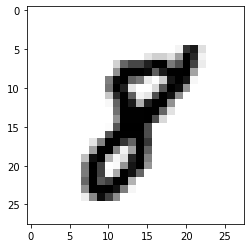

In [ ]:
pyplot.imshow(x_train[17], cmap=pyplot.get_cmap('binary'))

In [ ]:
print(y_train[17])

8


Or display multiple elements from the dataset :

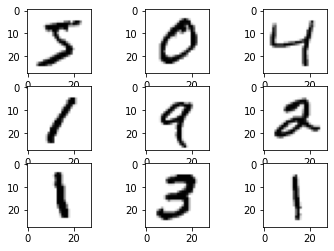

In [ ]:
for i in range(0, 9):
    pyplot.subplot(331 + i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('binary'))
pyplot.show()

Now let's display the associated labels :

In [ ]:
print (y_train[0:9].reshape(3,3))

[[5 0 4]
 [1 9 2]
 [1 3 1]]


More details about labels:

In [ ]:
import pandas as pd
train_labels_count = np.unique(y_train, return_counts=True)
dataframe_train_labels = pd.DataFrame({'Label':train_labels_count[0], 'Count':train_labels_count[1]})
dataframe_train_labels

,Label,Count
0,0,5923
1,1,6742
2,2,5958
3,3,6131
4,4,5842
5,5,5421
6,6,5918
7,7,6265
8,8,5851
9,9,5949


## Data Preprocessing

🟢 Prepare the data for training :

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Training

🟢 define the CNN model :

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        Conv2D(6, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 10)                4

🟢 Compile the model

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

🟢 Train the model :

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 23s 45ms/step - loss: 0.5058 - accuracy: 0.8616 - val_loss: 0.1664 - val_accuracy: 0.9502
Epoch 2/10
469/469 [==============================] - 21s 44ms/step - loss: 0.1532 - accuracy: 0.9542 - val_loss: 0.1086 - val_accuracy: 0.9666
Epoch 3/10
469/469 [==============================] - 21s 45ms/step - loss: 0.1159 - accuracy: 0.9652 - val_loss: 0.0868 - val_accuracy: 0.9723
Epoch 4/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0980 - accuracy: 0.9701 - val_loss: 0.0793 - val_accuracy: 0.9748
Epoch 5/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0854 - accuracy: 0.9742 - val_loss: 0.0680 - val_accuracy: 0.9796
Epoch 6/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0779 - accuracy: 0.9764 - val_loss: 0.0656 - val_accuracy: 0.9777
Epoch 7/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0716 - accuracy: 0.9780 - val_loss: 0.0586 - val_accuracy:

Evaluate the model :

In [ ]:
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

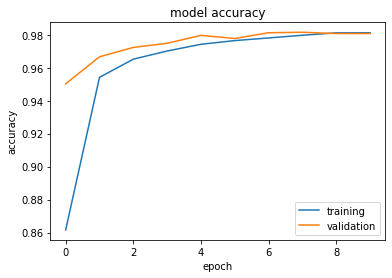

Test loss: 0.054
Test accuracy: 0.981


In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

### Test the model prediction on some examples :

In [ ]:
print (model.predict([x_train[0:9]]).argmax(axis=1))

1/1 [==============================] - 0s 141ms/step
[5 0 4 1 9 2 1 3 1]


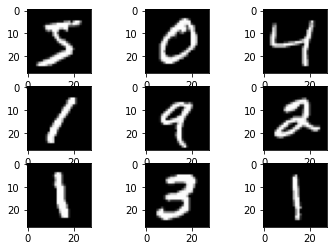

In [ ]:
for i in range(0, 9):
    pyplot.subplot(331 + i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()